---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-text-mining/resources/d9pwm) course resource._

---

# Assignment 3

In this assignment you will explore text message data and create models to predict if a message is spam or not. 

In [ ]:
import pandas as pd
import numpy as np
0
spam_data = pd.read_csv('spam.csv')

spam_data['target'] = np.where(spam_data['target']=='spam',1,0)
spam_data.head(10)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(spam_data['text'], 
                                                    spam_data['target'], 
                                                    random_state=0)

### Question 1
What percentage of the documents in `spam_data` are spam?

*This function should return a float, the percent value (i.e. $ratio * 100$).*

In [ ]:
def answer_one():
    
    
    return spam_data['target'].mean() * 100

In [ ]:
answer_one()

### Question 2

Fit the training data `X_train` using a Count Vectorizer with default parameters.

What is the longest token in the vocabulary?

*This function should return a string.*

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def answer_two():
    
    vect = CountVectorizer().fit(X_train)
    tokens = [w for w in vect.vocabulary_.keys()]
    lens = [len(w) for w in tokens]
    
    return tokens[np.argmax(lens)]

In [ ]:
answer_two()

### Question 3

Fit and transform the training data `X_train` using a Count Vectorizer with default parameters.

Next, fit a fit a multinomial Naive Bayes classifier model with smoothing `alpha=0.1`. Find the area under the curve (AUC) score using the transformed test data.

*This function should return the AUC score as a float.*

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, plot_roc_curve

def answer_three():
    vect = CountVectorizer().fit(X_train)
    X_train_vectorized = vect.transform(X_train)
    
    mdl = MultinomialNB(alpha = 0.1)
    mdl.fit(X_train_vectorized,y_train)
    
    X_test_vectorized = vect.transform(X_test)

    score = roc_auc_score(y_test, mdl.predict_proba(X_test_vectorized)[:,1])

    #plot_roc_curve(mdl,X_test_vectorized,y_test)

    return score

In [ ]:
answer_three()


### Question 4

Fit and transform the training data `X_train` using a Tfidf Vectorizer with default parameters.

What 20 features have the smallest tf-idf and what 20 have the largest tf-idf?

Put these features in a two series where each series is sorted by tf-idf value and then alphabetically by feature name. The index of the series should be the feature name, and the data should be the tf-idf.

The series of 20 features with smallest tf-idfs should be sorted smallest tfidf first, the list of 20 features with largest tf-idfs should be sorted largest first. 

*This function should return a tuple of two series
`(smallest tf-idfs series, largest tf-idfs series)`.*

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def answer_four():

    #fitting TfidfVectorizer to the data
    vect = TfidfVectorizer().fit(X_train)

    X_train_vectorized = vect.transform(X_train)
    
    #putting max values td-idfs into a dataframe and sorting it

    df = pd.DataFrame({"token": vect.get_feature_names_out(),
                        "td-idfs" :X_train_vectorized.max(0).toarray()[0] })
    df.columns.name = None

    smallest = df.sort_values(by = "td-idfs", ascending= True).iloc[:20]
    largest = df.sort_values(by = "td-idfs", ascending= False).iloc[:20]
    
    #adjusting data for the disired output format
    smallest_series = pd.Series(smallest['td-idfs'].tolist(), index = smallest['token'].tolist())
    largest_series = pd.Series(largest['td-idfs'].tolist(), index = largest['token'].tolist())

    return  (smallest_series,largest_series)  

In [ ]:
answer_four()

### Question 5

Fit and transform the training data `X_train` using a Tfidf Vectorizer ignoring terms that have a document frequency strictly lower than **3**.

Then fit a multinomial Naive Bayes classifier model with smoothing `alpha=0.1` and compute the area under the curve (AUC) score using the transformed test data.

*This function should return the AUC score as a float.*

In [ ]:
def answer_five():

    #fitting TfidfVectorizer to the data
    vect = TfidfVectorizer(min_df = 3).fit(X_train)
    X_train_vectorized = vect.transform(X_train)
    
    
    mdl = MultinomialNB(alpha = 0.1)
    mdl.fit(X_train_vectorized,y_train)
    
    X_test_vectorized = vect.transform(X_test)

    score = roc_auc_score(y_test, mdl.predict_proba(X_test_vectorized)[:,1])

    #plot_roc_curve(mdl,X_test_vectorized,y_test)

    return score

In [ ]:
answer_five()

### Question 6

What is the average length of documents (number of characters) for not spam and spam documents?

*This function should return a tuple (average length not spam, average length spam).*

In [ ]:
def answer_six():
    
    #adding length information inthe df
    spam_data['lenght'] = spam_data['text'].apply(lambda x : len(x))

    #calculating average values
    spam_text_len   = spam_data['lenght'][spam_data['target'] == 1].mean()
    n_spam_text_len = spam_data['lenght'][spam_data['target'] == 0].mean()

    return (n_spam_text_len,spam_text_len)

In [ ]:
answer_six()

<br>
<br>
The following function has been provided to help you combine new features into the training data:

In [ ]:
def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

### Question 7

Fit and transform the training data X_train using a Tfidf Vectorizer ignoring terms that have a document frequency strictly lower than **5**.

Using this document-term matrix and an additional feature, **the length of document (number of characters)**, fit a Support Vector Classification model with regularization `C=10000`. Then compute the area under the curve (AUC) score using the transformed test data.

*This function should return the AUC score as a float.*

In [ ]:
from sklearn.svm import SVC

def answer_seven():

    #fitting TfidfVectorizer to the data
    vect = TfidfVectorizer(min_df = 5).fit(X_train)
    X_train_vectorized = vect.transform(X_train)
    
    #adding length feature
    X_train_vectorized = add_feature(X_train_vectorized, X_train.apply(lambda x: len(x)))

    #fitting model
    mdl = SVC(C = 10000)
    mdl.fit(X_train_vectorized,y_train)
    
    X_test_vectorized = vect.transform(X_test)
    X_test_vectorized = add_feature(X_test_vectorized, X_test.apply(lambda x: len(x)))

    score = roc_auc_score(y_test, mdl.decision_function(X_test_vectorized))

    #plot_roc_curve(mdl,X_test_vectorized,y_test)
    
    return score

In [ ]:
answer_seven()

### Question 8

What is the average number of digits per document for not spam and spam documents?

*This function should return a tuple (average # digits not spam, average # digits spam).*

In [195]:
import re
def answer_eight():

    spam_data["n_digits"] = spam_data['text'].apply(lambda x : len(re.findall('\d',x)))

    #calculating average values
    spam_text_dgts   = spam_data["n_digits"][spam_data['target'] == 1].mean()
    n_spam_text_dgts = spam_data["n_digits"][spam_data['target'] == 0].mean()

    return (n_spam_text_dgts,spam_text_dgts)

In [196]:
answer_eight()

(0.2992746113989637, 15.759036144578314)

### Question 9

Fit and transform the training data `X_train` using a Tfidf Vectorizer ignoring terms that have a document frequency strictly lower than **5** and using **word n-grams from n=1 to n=3** (unigrams, bigrams, and trigrams).

Using this document-term matrix and the following additional features:
* the length of document (number of characters)
* **number of digits per document**

fit a Logistic Regression model with regularization `C=100`. Then compute the area under the curve (AUC) score using the transformed test data.

*This function should return the AUC score as a float.*

In [302]:
from sklearn.linear_model import LogisticRegression

def answer_nine():

    #fitting TfidfVectorizer to the data    
    vect = TfidfVectorizer(min_df = 5, ngram_range = (1,3)).fit(X_train)

    X_train_vectorized = vect.transform(X_train)

    X_train_vectorized = add_feature(X_train_vectorized, X_train.apply(lambda x: len(x)))
    X_train_vectorized = add_feature(X_train_vectorized, X_train.apply(lambda x: len(re.findall('\d',x))))

    #fitting model
    mdl = LogisticRegression(C = 100)
    mdl.fit(X_train_vectorized,y_train)
    
    X_test_vectorized = vect.transform(X_test)
    X_test_vectorized = add_feature(X_test_vectorized, X_test.apply(lambda x: len(x)))
    X_test_vectorized = add_feature(X_test_vectorized, X_test.apply(lambda x: len(re.findall('\d',x))))

    score = roc_auc_score(y_test, mdl.decision_function(X_test_vectorized))

    #plot_roc_curve(mdl,X_test_vectorized,y_test)
    
    return score

In [303]:
answer_nine()

/home/guilhermelro/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9978608899376942

### Question 10

What is the average number of non-word characters (anything other than a letter, digit or underscore) per document for not spam and spam documents?

*Hint: Use `\w` and `\W` character classes*

*This function should return a tuple (average # non-word characters not spam, average # non-word characters spam).*

In [294]:
def answer_ten():
    
    spam_data["n_non_words"] = spam_data['text'].apply(lambda x : len(re.sub('\w', '', x)))

    #calculating average values
    spam_text_n_wrd   = spam_data["n_non_words"][spam_data['target'] == 1].mean()
    n_spam_text_n_wrd = spam_data["n_non_words"][spam_data['target'] == 0].mean()

    return (n_spam_text_n_wrd,spam_text_n_wrd)

In [295]:
answer_ten()

(17.29181347150259, 29.041499330655956)

### Question 11

Fit and transform the training data X_train using a Count Vectorizer ignoring terms that have a document frequency strictly lower than **5** and using **character n-grams from n=2 to n=5.**

To tell Count Vectorizer to use character n-grams pass in `analyzer='char_wb'` which creates character n-grams only from text inside word boundaries. This should make the model more robust to spelling mistakes.

Using this document-term matrix and the following additional features:
* the length of document (number of characters)
* number of digits per document
* **number of non-word characters (anything other than a letter, digit or underscore.)**

fit a Logistic Regression model with regularization C=100. Then compute the area under the curve (AUC) score using the transformed test data.

Also **find the 10 smallest and 10 largest coefficients from the model** and return them along with the AUC score in a tuple.

The list of 10 smallest coefficients should be sorted smallest first, the list of 10 largest coefficients should be sorted largest first.

The three features that were added to the document term matrix should have the following names should they appear in the list of coefficients:
['length_of_doc', 'digit_count', 'non_word_char_count']

*This function should return a tuple `(AUC score as a float, smallest coefs list, largest coefs list)`.*

In [325]:
def answer_eleven():
    
    #fitting TfidfVectorizer to the data    
    vect = TfidfVectorizer(min_df = 5, ngram_range = (2,5), analyzer='char_wb').fit(X_train)

    X_train_vectorized = vect.transform(X_train)
    X_train_vectorized = add_feature(X_train_vectorized, X_train.apply(lambda x: len(x)))
    X_train_vectorized = add_feature(X_train_vectorized, X_train.apply(lambda x: len(re.findall('\d',x))))
    X_train_vectorized = add_feature(X_train_vectorized, X_train.apply(lambda x: len(re.sub('\w', '', x))))
    
    #fitting model
    mdl = LogisticRegression(C = 100)
    mdl.fit(X_train_vectorized,y_train)
    
    X_test_vectorized = vect.transform(X_test)
    X_test_vectorized = add_feature(X_test_vectorized, X_test.apply(lambda x: len(x)))
    X_test_vectorized = add_feature(X_test_vectorized, X_test.apply(lambda x: len(re.findall('\d',x))))
    X_test_vectorized = add_feature(X_test_vectorized, X_test.apply(lambda x: len(re.sub('\w', '', x))))

    plot_roc_curve(mdl,X_test_vectorized,y_test)
    
    score = roc_auc_score(y_test, mdl.decision_function(X_test_vectorized))

    feature_names = np.array(vect.get_feature_names() + ['length_of_doc', 'digit_count', 'non_word_char_count'])

    sorted_coef_index = mdl.coef_[0].argsort()
    
    # Retrieve feature names
    smallest = feature_names[sorted_coef_index[:10]]
    largest =  feature_names[sorted_coef_index[-10:]]
    
    
    return (score, smallest, largest[::-1])

/home/guilhermelro/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/guilhermelro/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/guilhermelro/.local/lib/python3.9/site-packages/sklearn/ut

(0.9990535286827497,
 array(['..', 'i ', 'ca', 'if', ' i', '. ', 'if ', 't;', ' 6', ' if '],
       dtype='<U19'),
 array(['**', 'ww', '***', 'xt', 'co', '****', 'ex', 'uk', 'tone', 'ne'],
       dtype='<U19'))

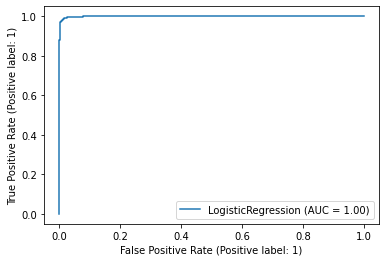

In [326]:
answer_eleven()